In [11]:
# Veri setini yükleyebilmek için Requests ve openpyxl yüklüyoruz
pip install requests openpyxl

In [215]:
######################################
# 1 Gerekli kütüphanelerin yüklenmesi :
######################################
# Veri analizi ve manipülasyonu için pandas kütüphanesini kullanırız.
import pandas as pd
# .zip dosyaları ile işlem yapabilmek için zipfile kütüphanesi kullanırız.
import zipfile
# İnternet üzerinden veri çekmek veya göndermek gibi işlemler yapabilmek için request kütüphanesi kullanırız.
import requests
# Dosyalar üzerinde işlem yapabilmek için io kütüphanesi kullanırız.
import io
# Diziler ve matrisler üzerinde matematiksel işlem yapmak için numpy kütüphanesini kullanırız.
import numpy as np
# Verileri görselleştirmek ve grafikler oluşturmak için matplotlib kütüphanesini kullanırız.
import matplotlib.pyplot as plt
# Daha yüksek seviyede görselleştirme yapmak seaborn kütüphanesini kullanırız.
import seaborn as sns
# Hem denetimli hem de denetimsiz öğrenme algoritmalarını destekleyen scikit-learn, veri işleme ve modelleme süreçlerini kolaylaştırmak için kapsamlı araçlar sunan sklearn kütüphane kullanılır..
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import label_binarize
from xgboost import XGBClassifier

In [232]:
# Dry Bean Dataset ZIP dosyasını internetten çekeriz.
url = "https://archive.ics.uci.edu/static/public/602/dry+bean+dataset.zip"
response = requests.get(url)

# Dry Bean Dataset ZIP dosyasını açarız.
with zipfile.ZipFile(io.BytesIO(response.content)) as archive:
    # Dry Bean Dataset ZIP dosyasının içindeki dosyalara gözatarız.
    print(archive.namelist())

    #  Dry Bean Dataset ZIP dosyası içindeki EXCEL dosyasını açarız.
    with archive.open('DryBeanDataset/Dry_Bean_Dataset.xlsx') as file:
        df = pd.read_excel(file, engine='openpyxl')

# Data Frame içindeki ilk 5 satırı gösteririz.
df.head()

['DryBeanDataset/', 'DryBeanDataset/Dry_Bean_Dataset.arff', 'DryBeanDataset/Dry_Bean_Dataset.txt', 'DryBeanDataset/Dry_Bean_Dataset.xlsx']


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [146]:
# Data Frame özetine bakarak veri setini inceleriz. Farklı kuru fasulye (bean) türlerini, fasulyelerin görsel/morfolojik özelliklerine göre otomatik olarak sınıflandırmak için hazırlanmış olduğunu görüyoruz. Bir kuru fasulyenin (bean) hangi tür olduğunu yani sınıfını (class) tespit ediyoruz.
# Veri seti içinde 13611 kayıt bulunmakta ve feature boş kayıt bulunmamaktadır. Kuru Fasulyenin (bean) Piksel cinsinden alanı (area), çevresi(perimeter), ana (MajorAxisLength) ve ikincil(MinorAxisLength) eksen uzunluğu, yuvarlaklık(Roundness) ölçüsü v.b. 15 özelliğini (feature) tutmaktadır.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [147]:
# Veri setinde SEKER, BARBUNYA, BOMBAY, CALI, HOROZ, SIRA, DERMASON olmak üzere 7 farklı kuru fasulye türü sınıfı bulunuyor.
print(df['Class'].unique())

['SEKER' 'BARBUNYA' 'BOMBAY' 'CALI' 'HOROZ' 'SIRA' 'DERMASON']


#################################################
# Bölüm 1: Veri Ön İşleme (Preprocessing)
#################################################

In [160]:
#####################################
# 2. Verti setinin rastgele en az 2 sütununa %5 oranında bir sutununa ise %35 oranında missin value eklenecektir.
#####################################
df_m = df.copy()
df_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [161]:
#####################################
# 2.a. Eksik Verileri Gözlemle
#####################################

# İlk 2 Sütun olan Area, Perimeter özelliklerini %5 oranında eksik veri ekleriz.
for col in df_m.columns[:2]:
    missing_indices = np.random.choice(df_m.index, size=int(len(df_m) * 0.05), replace=False)
    df_m.loc[missing_indices, col] = np.nan

# 10. Sütun olan roundness Üçüncü sütuna %35 oranında eksik veri ekleriz.
missing_indices = np.random.choice(df_m.index, size=int(len(df_m) * 0.35), replace=False)
df_m.loc[missing_indices, df_m.columns[10]] = np.nan

# Data Frame özetine bakacak olursak Area, Perimeter sütunuları için 680 (%5), roundness sütunu için 4763 (%35) satır eksik veri eklenmiştir.
print(df_m.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             12931 non-null  float64
 1   Perimeter        12931 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        8848 non-null   float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [162]:
# Eksik verileri adetsel olarak gösteririz.
print(df_m.isnull().sum())

# Eksik verileri yüzdesel olarak gösteririz.
missing_percent = df_m.isnull().mean() * 100
print(missing_percent)

Area                680
Perimeter           680
MajorAxisLength       0
MinorAxisLength       0
AspectRation          0
Eccentricity          0
ConvexArea            0
EquivDiameter         0
Extent                0
Solidity              0
roundness          4763
Compactness           0
ShapeFactor1          0
ShapeFactor2          0
ShapeFactor3          0
ShapeFactor4          0
Class                 0
dtype: int64
Area                4.995959
Perimeter           4.995959
MajorAxisLength     0.000000
MinorAxisLength     0.000000
AspectRation        0.000000
Eccentricity        0.000000
ConvexArea          0.000000
EquivDiameter       0.000000
Extent              0.000000
Solidity            0.000000
roundness          34.993755
Compactness         0.000000
ShapeFactor1        0.000000
ShapeFactor2        0.000000
ShapeFactor3        0.000000
ShapeFactor4        0.000000
Class               0.000000
dtype: float64


ConvexArea sütununda toplam 550 adet aykırı değer bulunuyor.


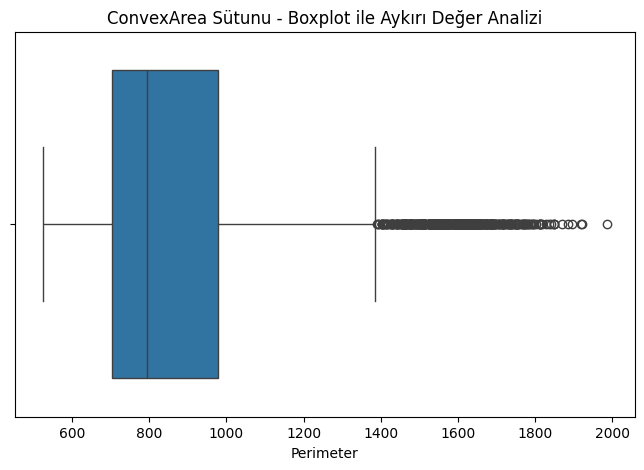

In [163]:
#####################################
# 2.b. %5 Eksik Verileri Ortalama (mean) veya Medyan ile Doldur
#####################################

# Eksik veri eklediğimiz Area aykırı değerlerini kontrol ederiz. Eğer aykırı değer fazla ile Medyan ile doldurmak daha güvenli ve doğrudur.

# IQR hesaplamak için önce Q1 ve Q3 hesaplanır. Sonra IQR hesaplanır.
Q1 = df_m['ConvexArea'].quantile(0.25)
Q3 = df_m['ConvexArea'].quantile(0.75)
IQR = Q3 - Q1

# Alt ve Üst Limitler Hesaplanır.
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Aykırı değerlerler bulunur.
outliers = df_m[(df_m['ConvexArea'] < lower_bound) | (df_m['ConvexArea'] > upper_bound)]
print(f"ConvexArea sütununda toplam {outliers.shape[0]} adet aykırı değer bulunuyor.")

plt.figure(figsize=(8,5))
sns.boxplot(x=df_m['Perimeter'])
plt.title('ConvexArea Sütunu - Boxplot ile Aykırı Değer Analizi')
plt.show()

Area sütununda toplam 528 adet aykırı değer bulunuyor.


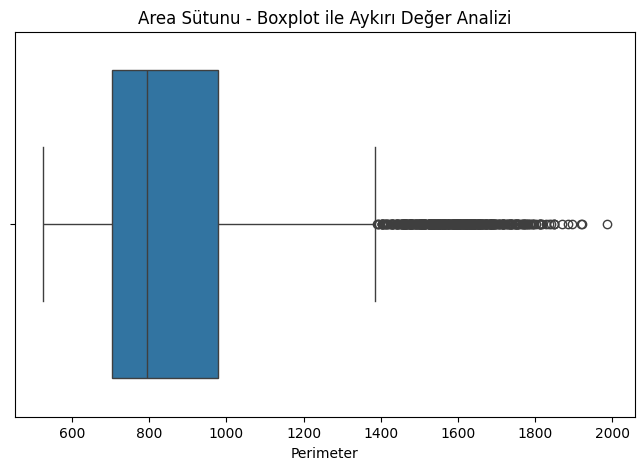

In [164]:
#####################################
# 2.b. %5 Eksik Verileri Ortalama (mean) veya Medyan ile Doldur
#####################################

# Eksik veri eklediğimiz Area aykırı değerlerini kontrol ederiz. Eğer aykırı değer fazla ile Medyan ile doldurmak daha güvenli ve doğrudur.

# IQR hesaplamak için önce Q1 ve Q3 hesaplanır. Sonra IQR hesaplanır.
Q1 = df_m['Area'].quantile(0.25)
Q3 = df_m['Area'].quantile(0.75)
IQR = Q3 - Q1

# Alt ve Üst Limitler Hesaplanır.
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Aykırı değerlerler bulunur.
outliers = df_m[(df_m['Area'] < lower_bound) | (df_m['Area'] > upper_bound)]
print(f"Area sütununda toplam {outliers.shape[0]} adet aykırı değer bulunuyor.")

plt.figure(figsize=(8,5))
sns.boxplot(x=df_m['Perimeter'])
plt.title('Area Sütunu - Boxplot ile Aykırı Değer Analizi')
plt.show()

In [165]:
# Veri Setimizde Area sütunundaki aykırı değer sayısı fazla olduğundan eksik verileri medyan ile doldururuz.
df_m['Area'].fillna(df_m['Area'].median(), inplace=True)
print(df_m.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  float64
 1   Perimeter        12931 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        8848 non-null   float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

<ipython-input-165-73b9cf4a3a93>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_m['Area'].fillna(df_m['Area'].median(), inplace=True)


Perimeter sütununda toplam 468 adet aykırı değer bulunuyor.


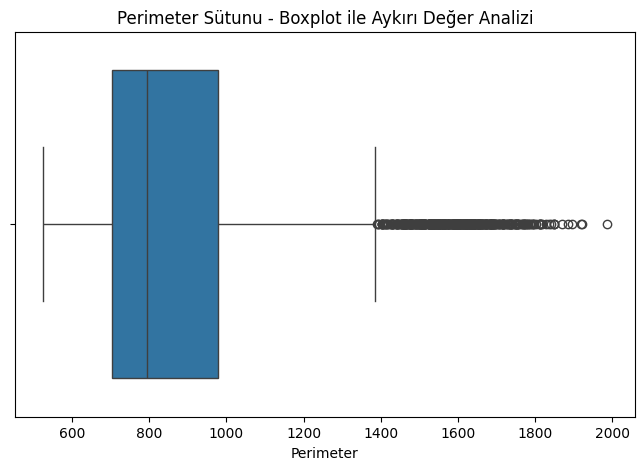

In [166]:
# Eksik veri eklediğimiz Perimeter aykırı değerlerini kontrol ederiz.

# IQR hesaplamak için önce Q1 ve Q3 hesaplanır. Sonra IQR hesaplanır.
Q1 = df_m['Perimeter'].quantile(0.25)
Q3 = df_m['Perimeter'].quantile(0.75)
IQR = Q3 - Q1

# Alt ve Üst Limitler Hesaplanır.
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Aykırı değerlerler bulunur.
outliers = df_m[(df_m['Perimeter'] < lower_bound) | (df_m['Perimeter'] > upper_bound)]
print(f"Perimeter sütununda toplam {outliers.shape[0]} adet aykırı değer bulunuyor.")

plt.figure(figsize=(8,5))
sns.boxplot(x=df_m['Perimeter'])
plt.title('Perimeter Sütunu - Boxplot ile Aykırı Değer Analizi')
plt.show()

In [167]:
# Veri Setimizde Perimeter sütunundaki aykırı değer sayısı fazla olduğundan eksik verileri medyan ile doldururuz.
df_m['Perimeter'].fillna(df_m['Perimeter'].median(), inplace=True)
print(df_m.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  float64
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        8848 non-null   float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

<ipython-input-167-38466a89893b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_m['Perimeter'].fillna(df_m['Perimeter'].median(), inplace=True)


In [168]:
#####################################
# 2.c. %35 Eksik Verileri Sütun veya Satır Bazlı Sil
#####################################

# Bİr sütunda çok fazla eksik veri varsa sütun silinebilir. Bazı satırlar eksikse satır silinebilir. Eğer sütun çok önemli özellik ise sütun silinemez.
# Bu doğrultuda roundness bakacak olursak %35 eksik olduğu için sütun silmek daha doğru gözüksede bilgi kaybına yol açacağı için fasulyenin şekil özelliği olduğu ve önemli olduğu için satır silmek daha mantıklı olur. Çünkü %35 silsekde elimizde %65 gibi daha büyük bir veri seti kalıyor olur.

# Veri setimizde sadece Roundness kolonunda NaN olan satırları sileriz.
df_m = df_m.dropna(subset=['roundness'])
print(df_m.info())

<class 'pandas.core.frame.DataFrame'>
Index: 8848 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             8848 non-null   float64
 1   Perimeter        8848 non-null   float64
 2   MajorAxisLength  8848 non-null   float64
 3   MinorAxisLength  8848 non-null   float64
 4   AspectRation     8848 non-null   float64
 5   Eccentricity     8848 non-null   float64
 6   ConvexArea       8848 non-null   int64  
 7   EquivDiameter    8848 non-null   float64
 8   Extent           8848 non-null   float64
 9   Solidity         8848 non-null   float64
 10  roundness        8848 non-null   float64
 11  Compactness      8848 non-null   float64
 12  ShapeFactor1     8848 non-null   float64
 13  ShapeFactor2     8848 non-null   float64
 14  ShapeFactor3     8848 non-null   float64
 15  ShapeFactor4     8848 non-null   float64
 16  Class            8848 non-null   object 
dtypes: float64(15), in

In [169]:
#####################################
# 3.	Aykırı Değer Tespiti (Outlier Detection)
#####################################

# IQR hesaplamak için önce Q1 ve Q3 hesaplanır. Sonra IQR hesaplanır.
def iqr_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

# Feature aykırı değerlerleri bulunur. Son sütun ('Class') kategorik olduğu için hariç tutulur.
for col in df_m.columns[:-1]:
  outliers = iqr_outliers(df_m[col])
  print(f"{col} sütunundaki Toplam aykırı değer sayısı: {len(outliers)}")

Area sütunundaki Toplam aykırı değer sayısı: 374
Perimeter sütunundaki Toplam aykırı değer sayısı: 316
MajorAxisLength sütunundaki Toplam aykırı değer sayısı: 248
MinorAxisLength sütunundaki Toplam aykırı değer sayısı: 378
AspectRation sütunundaki Toplam aykırı değer sayısı: 278
Eccentricity sütunundaki Toplam aykırı değer sayısı: 544
ConvexArea sütunundaki Toplam aykırı değer sayısı: 363
EquivDiameter sütunundaki Toplam aykırı değer sayısı: 348
Extent sütunundaki Toplam aykırı değer sayısı: 182
Solidity sütunundaki Toplam aykırı değer sayısı: 478
roundness sütunundaki Toplam aykırı değer sayısı: 60
Compactness sütunundaki Toplam aykırı değer sayısı: 57
ShapeFactor1 sütunundaki Toplam aykırı değer sayısı: 355
ShapeFactor2 sütunundaki Toplam aykırı değer sayısı: 0
ShapeFactor3 sütunundaki Toplam aykırı değer sayısı: 115
ShapeFactor4 sütunundaki Toplam aykırı değer sayısı: 503


In [170]:
# IQR sonucu float64 tipinde olduğu için Winsorization Yöntemi ile aykırı değerleri sınıra çektiğimizde ConvexArea Int64 olduğu için veri uyumsuzluğu olur.
# Bu yüzden ConvexArea sütununu Int64 ten Float64 e çeviririz. Hesaplanan IQR değeri tip uyuşmazlığı olmasın diye.
df_m['ConvexArea'] = df_m['ConvexArea'].astype('float64')

# Winsorization Yöntemi ile aykırı değerleri sınıra eşitliyoruz.
for col in df_m.columns[:-1]:
    Q1 = df_m[col].quantile(0.25)
    Q3 = df_m[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Her sütunda ayrı ayrı Winsorization
    df_m.loc[df_m[col] < lower_bound, col] = lower_bound
    df_m.loc[df_m[col] > upper_bound, col] = upper_bound

In [171]:
# Son duruma tekrar bakacak olursak aykırı değerlerin sıfırlandığını gözüyoruz.
def iqr_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

# Feature aykırı değerlerleri bulunur. Son sütun ('Class') kategorik olduğu için hariç tutulur.
for col in df_m.columns[:-1]:
  outliers = iqr_outliers(df_m[col])
  print(f"{col} sütunundaki Toplam aykırı değer sayısı: {len(outliers)}")

Area sütunundaki Toplam aykırı değer sayısı: 0
Perimeter sütunundaki Toplam aykırı değer sayısı: 0
MajorAxisLength sütunundaki Toplam aykırı değer sayısı: 0
MinorAxisLength sütunundaki Toplam aykırı değer sayısı: 0
AspectRation sütunundaki Toplam aykırı değer sayısı: 0
Eccentricity sütunundaki Toplam aykırı değer sayısı: 0
ConvexArea sütunundaki Toplam aykırı değer sayısı: 0
EquivDiameter sütunundaki Toplam aykırı değer sayısı: 0
Extent sütunundaki Toplam aykırı değer sayısı: 0
Solidity sütunundaki Toplam aykırı değer sayısı: 0
roundness sütunundaki Toplam aykırı değer sayısı: 0
Compactness sütunundaki Toplam aykırı değer sayısı: 0
ShapeFactor1 sütunundaki Toplam aykırı değer sayısı: 0
ShapeFactor2 sütunundaki Toplam aykırı değer sayısı: 0
ShapeFactor3 sütunundaki Toplam aykırı değer sayısı: 0
ShapeFactor4 sütunundaki Toplam aykırı değer sayısı: 0


In [233]:
#####################################
# 4. Özellik Ölçekleme (Feature Scaling)
#####################################
# Veri setimiz sayısal ve farklı ölçülerde değerler içermektedir. Aykırı değerleri temizledik. Bu yüzden StandardScaler daha doğru seçim olur.
# Kategorik veri olan class sütunu dışında kalan sayısal kolonlar ölçeklendirilir.
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_m.drop(columns=['Class']))

scaled_df_m = pd.DataFrame(scaled_features, columns=df_m.columns[:-1])
scaled_df_m['Class'] = df_m['Class'].values
scaled_df_m.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,-1.189885,-1.294296,-1.373945,-0.763002,-1.587363,-2.169948,-1.156367,-1.256119,0.283279,0.396294,1.447511,1.839713,0.703825,2.400245,1.936549,1.025597,SEKER
1,-1.170938,-1.140415,-1.469351,-0.489915,-2.002036,-2.169948,-1.132504,-1.232173,0.702053,-0.694357,0.226408,2.320942,0.375733,3.099508,2.296812,0.936000,SEKER
2,-1.099733,-1.096760,-1.344278,-0.496642,-1.768266,-2.169948,-1.051466,-1.143422,0.675169,-2.339074,0.517138,2.083188,0.411132,2.513234,2.217221,-0.355503,SEKER
3,-1.092355,-1.239669,-1.452858,-0.256988,-2.153884,-2.169948,-1.067496,-1.134335,0.474965,0.970378,1.909337,2.320942,0.113843,3.269729,2.296812,1.160553,SEKER
4,-1.084586,-1.157570,-1.319314,-0.527710,-1.695874,-2.169948,-1.057940,-1.124787,0.529083,0.580532,1.203692,2.008331,0.414234,2.409465,2.130442,1.181833,SEKER


In [234]:
#####################################
# 5. Kategorik Verilerin Kodlanması
#####################################

# Model string veriyi anlamakta zorluk çekeceği için LabelEncoder nesnesi oluşturularak Class sütununa Label Encoding uygularız. Diğer süstunlarda kategorik veri olmadığı sayısal veri içerdiği için kullanmayız.
le = LabelEncoder()
scaled_df_m['Class'] = le.fit_transform(scaled_df_m['Class'])
print(list(le.classes_))
print('\n')
scaled_df_m.head()

['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA']




,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,-1.189885,-1.294296,-1.373945,-0.763002,-1.587363,-2.169948,-1.156367,-1.256119,0.283279,0.396294,1.447511,1.839713,0.703825,2.400245,1.936549,1.025597,5
1,-1.170938,-1.140415,-1.469351,-0.489915,-2.002036,-2.169948,-1.132504,-1.232173,0.702053,-0.694357,0.226408,2.320942,0.375733,3.099508,2.296812,0.936000,5
2,-1.099733,-1.096760,-1.344278,-0.496642,-1.768266,-2.169948,-1.051466,-1.143422,0.675169,-2.339074,0.517138,2.083188,0.411132,2.513234,2.217221,-0.355503,5
3,-1.092355,-1.239669,-1.452858,-0.256988,-2.153884,-2.169948,-1.067496,-1.134335,0.474965,0.970378,1.909337,2.320942,0.113843,3.269729,2.296812,1.160553,5
4,-1.084586,-1.157570,-1.319314,-0.527710,-1.695874,-2.169948,-1.057940,-1.124787,0.529083,0.580532,1.203692,2.008331,0.414234,2.409465,2.130442,1.181833,5


#################################################
# Bölüm 2: Özellik Seçimi ve Boyut İndirgeme
#################################################

Component 1: 0.5888 --> Varyans değeri ortalama açıklanan varyans değerinden büyük olan seçilen component
Component 2: 0.2422 --> Varyans değeri ortalama açıklanan varyans değerinden büyük olan seçilen component
Component 3: 0.0677 --> Varyans değeri ortalama açıklanan varyans değerinden büyük olan seçilen component
Component 4: 0.0512
Component 5: 0.0282
Component 6: 0.0074
Component 7: 0.0044
Component 8: 0.0038
Component 9: 0.0027
Component 10: 0.0018
Component 11: 0.0011
Component 12: 0.0005
Component 13: 0.0001
Component 14: 0.0001
Component 15: 0.0000
Component 16: 0.0000

Ortalama açıklanan varyans oranı: 0.0625
Seçilen bileşen sayısı: 3


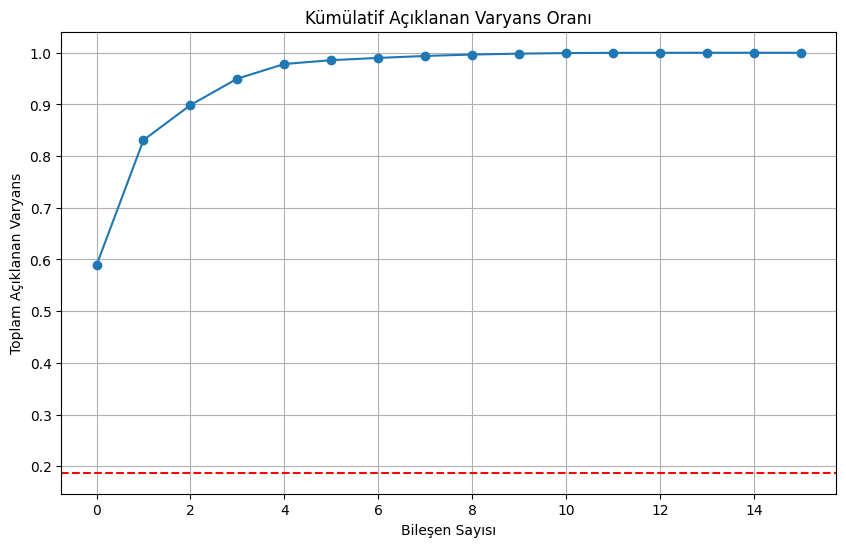

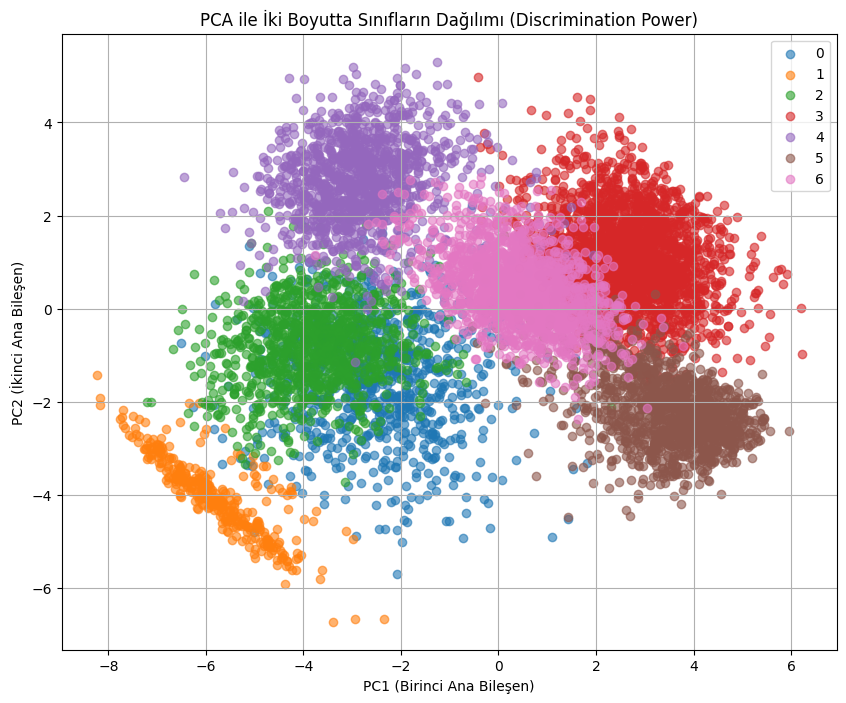

In [203]:
#####################################
# 6.	PCA (Principal Component Analysis)
#####################################

# Kategorik olan class sütunu (etiket) hariç Sayısal değerleri X değişkenine alırız.
X = scaled_df_m.drop(columns=['Class'])

# Kategorik olan class sütunu (etiket) değerlerini y değişkenine alırız.
y = scaled_df_m['Class']

# PCA modeli oluştururuz.
pca = PCA()
X_pca = pca.fit_transform(X)

# Ortalama açıklanan varians oranı hesaplarız.
explained_variances = pca.explained_variance_ratio_
mean_explained_variance = explained_variances.mean()
for i, variance in enumerate(explained_variances):
  if variance > mean_explained_variance:
    print(f"Component {i+1}: {variance:.4f} --> Varyans değeri ortalama açıklanan varyans değerinden büyük olan seçilen component")
  else :
    print(f"Component {i+1}: {variance:.4f}")
print(f"\nOrtalama açıklanan varyans oranı: {mean_explained_variance:.4f}")

# Ortalama açıklanan varyanstan büyük olan bileşenler seçeriz.
selected_components = np.sum(explained_variances > mean_explained_variance)
print(f"Seçilen bileşen sayısı: {selected_components}")

# Yeniden PCA sadece seçilen bileşen sayısıyla yapalım
pca_selected = PCA(n_components=selected_components)
X_pca_selected = pca_selected.fit_transform(X)

# Kümülatif açıklanan varyans oran grafiğinde x ekseni seçilen bileşen sayısını, y ekseni toplam açıklanan varyans oranını göstermektedir. Toplam varyans %100 olana kadar artar.
# Eğim ilk başta yüksek sonra azalmaktadır. Bu ilk bileşenlerin çok fazla bilgi taşıdığını gösterir. sonraki bileşenlerinde az bilgi taşıdğını gösterir.
# 2–3 bileşen ile %70–80 açıklanan varyansa ulaşabildiğimiz için boyut indirgeme başarılı gözükmektedir. Çok bileşen kullanmadan verinin çoğunu temsil ediyor demektir.
plt.figure(figsize=(10,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.axhline(y=mean_explained_variance * selected_components, color='r', linestyle='--')
plt.title('Kümülatif Açıklanan Varyans Oranı')
plt.xlabel('Bileşen Sayısı')
plt.ylabel('Toplam Açıklanan Varyans')
plt.grid(True)
plt.show()

# İlk iki öznitelik için sınıfların dağılımı (Discrimination Power) grafiğini çizeriz.
# Her sınıfı farklı renklerde gösteriyoruz. Eğer sınıflar birbirinden iyi ayrılıyor ise ilk 2 bileşenin sınıfları ayırt etmesi güçlü yani discrimination power yüksek demektir.
# Eğer üst üste biniyorsa ilk 2 bileşen yetersiz daha fazla bileşen gerekiyor demektir. Grafiğe göre yüksek gözükmektedir ve ilk 2 bileşen yeterli gözükmektedir.
plt.figure(figsize=(10,8))

for label in np.unique(y):
    plt.scatter(X_pca[:, 0][y == label], X_pca[:, 1][y == label], label=label, alpha=0.6)

plt.xlabel('PC1 (Birinci Ana Bileşen)')
plt.ylabel('PC2 (İkinci Ana Bileşen)')
plt.title('PCA ile İki Boyutta Sınıfların Dağılımı (Discrimination Power)')
plt.legend()
plt.grid(True)
plt.show()

LDA ile dönüşen veri boyutu: (8848, 3)


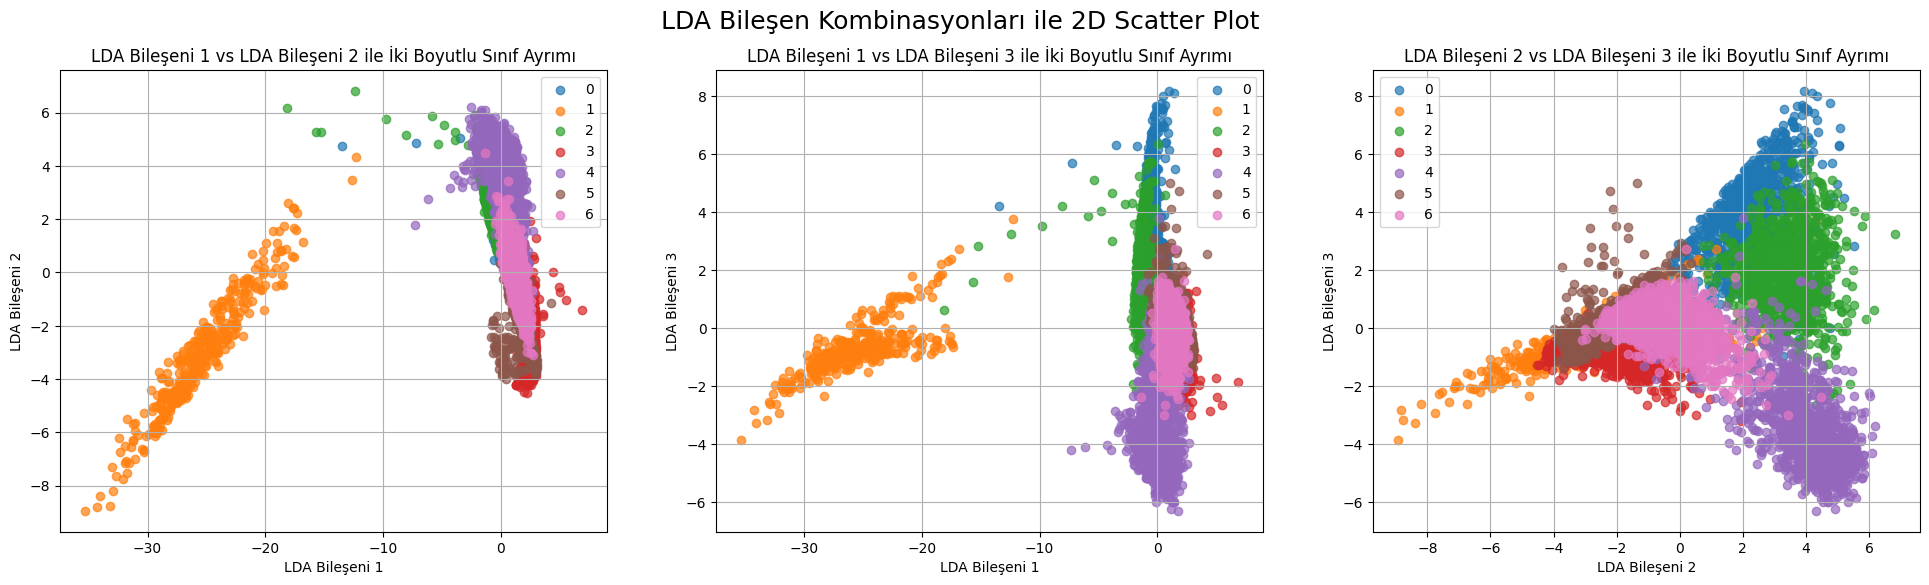

In [209]:
#####################################
# 7. LDA (Linear Discriminant Analysis)
#####################################

# Kategorik olan class sütunu (etiket) hariç Sayısal değerleri X değişkenine alırız.
X = scaled_df_m.drop(columns=['Class'])

# Kategorik olan class sütunu (etiket) değerlerini y değişkenine alırız.
y = scaled_df_m['Class']

# LDA modelini oluştururuz. (n_components = 3 seçiyoruz)
lda = LDA(n_components=3)
X_lda = lda.fit_transform(X, y)
print(f"LDA ile dönüşen veri boyutu: {X_lda.shape}")

fig, axes = plt.subplots(1, 3, figsize=(24, 6))

# 1.LDA bileşeni vs 2.LDA bileşeni
# Genellikle 1.LDA ve LDA en fazla ayrımı sağlar.
for label in np.unique(y):
    axes[0].scatter(X_lda[:, 0][y == label], X_lda[:, 1][y == label], label=label, alpha=0.7)
axes[0].set_xlabel('LDA Bileşeni 1')
axes[0].set_ylabel('LDA Bileşeni 2')
axes[0].set_title('LDA Bileşeni 1 vs LDA Bileşeni 2 ile İki Boyutlu Sınıf Ayrımı')

# 2.LDA bileşeni vs 3.LDA bileşeni
# 3.LDA tek başına güçlü bir ayrıştırıcı olmadığını görüyoruz.
for label in np.unique(y):
    axes[1].scatter(X_lda[:, 0][y == label], X_lda[:, 2][y == label], label=label, alpha=0.7)
axes[1].set_xlabel('LDA Bileşeni 1')
axes[1].set_ylabel('LDA Bileşeni 3')
axes[1].set_title('LDA Bileşeni 1 vs LDA Bileşeni 3 ile İki Boyutlu Sınıf Ayrımı')

# 2.LDA bileşeni vs 3.LDA bileşeni
# Bazı sınıflar birbirine daha yakın ve üst üste geçmiş olabilir.
for label in np.unique(y):
    axes[2].scatter(X_lda[:, 1][y == label], X_lda[:, 2][y == label], label=label, alpha=0.7)
axes[2].set_xlabel('LDA Bileşeni 2')
axes[2].set_ylabel('LDA Bileşeni 3')
axes[2].set_title('LDA Bileşeni 2 vs LDA Bileşeni 3 ile İki Boyutlu Sınıf Ayrımı')

# 1.LDA ana ayrımı yapan bileşen olduğunu görüyoruz. 3.LDA daha az ayrım yaptığını görüyoruz.
for ax in axes:
    ax.legend()
    ax.grid(True)

plt.suptitle('LDA Bileşen Kombinasyonları ile 2D Scatter Plot', fontsize=18)
plt.show()


#################################################
# Bölüm 3: Modelleme ve Değerlendirme
#################################################

In [228]:
#####################################
# 8. Nested Cross-Validation Yapısı
# 9. Sınıflandırıcılar
# 10. Performans Metrikleri Sonucu
#####################################

# Ham, Seçilmiş PCA Dönüşümü ve LDA Dönüşümü yapılmış verimizi hazırlarız.
X = scaled_df_m.drop(columns=['Class']).values
X_pca = X_pca_selected
X_lda = X_lda
y = scaled_df_m['Class'].values

# Kullanacağımız sınıflandırıcıları tanımlarız.
classifiers = {
    'Logistic Regression': (LogisticRegression(max_iter=1000, random_state=42), {'C': [0.01, 0.1, 1, 10]}),
    'Decision Tree': (DecisionTreeClassifier(random_state=42), {'max_depth': [3, 5, 10, None]}),
    'Random Forest': (RandomForestClassifier(random_state=42), {'n_estimators': [50, 100, 200]}),
    'XGBoost': (XGBClassifier(eval_metric='mlogloss', random_state=42), {'n_estimators': [50, 100], 'max_depth': [3, 6]}),
    'Naive Bayes': (GaussianNB(), {})
}

# Nested Cross Validation Dış döngü (Outer Loop) 5 katmanlı olacak şekilde oluşturuyoruz.
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=None)
# Nested Cross Validation İç döngü (Inner Loop) 3 katmanlı olacak şekilde oluşturuyoruz.
inner_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Kullanacağımız verileri tanımlıyoruz.
data_versions = {
    'Ham Veri': X,
    'PCA Veri': X_pca,
    'LDA Veri': X_lda
}

all_results = []
roc_results = {}

# Her veri seti ve her sınıflandırıcı model için çalışacak şekilde döngümüzü oluşturuyoruz.
for data_name, features in data_versions.items():
    for model_name, (model, param_grid) in classifiers.items():
        # Raporlayacağımız metrikleri tanımlıyoruz.
        outer_metrics = {'accuracy': [], 'precision': [], 'recall': [], 'f1': []}
        best_fold = {'model': None, 'X_test': None, 'y_test': None, 'y_score': None}

        for train_idx, test_idx in outer_cv.split(features, y):
            X_train, X_test = features[train_idx], features[test_idx]
            y_train, y_test = y[train_idx], y[test_idx]

            if param_grid:
                grid_search = GridSearchCV(model, param_grid, cv=inner_cv, scoring='accuracy', n_jobs=-1)
                grid_search.fit(X_train, y_train)
                best_model = grid_search.best_estimator_
            else:
                best_model = model
                best_model.fit(X_train, y_train)

            y_score = best_model.predict_proba(X_test) if hasattr(best_model, "predict_proba") else best_model.decision_function(X_test)
            y_pred = best_model.predict(X_test)

            acc = accuracy_score(y_test, y_pred)
            outer_metrics['accuracy'].append(acc)
            outer_metrics['precision'].append(precision_score(y_test, y_pred, average='macro', zero_division=0))
            outer_metrics['recall'].append(recall_score(y_test, y_pred, average='macro', zero_division=0))
            outer_metrics['f1'].append(f1_score(y_test, y_pred, average='macro', zero_division=0))

            # En iyi fold buluyoruz.
            if best_fold['model'] is None or acc > max(outer_metrics['accuracy'][:-1]):
                best_fold['model'] = best_model
                best_fold['X_test'] = X_test
                best_fold['y_test'] = y_test
                best_fold['y_score'] = y_score

        result = {
            'Veri Temsili': data_name,
            'Model': model_name,
            'Accuracy Mean': np.mean(outer_metrics['accuracy']),
            'Accuracy Std': np.std(outer_metrics['accuracy']),
            'Precision Mean': np.mean(outer_metrics['precision']),
            'Precision Std': np.std(outer_metrics['precision']),
            'Recall Mean': np.mean(outer_metrics['recall']),
            'Recall Std': np.std(outer_metrics['recall']),
            'F1 Mean': np.mean(outer_metrics['f1']),
            'F1 Std': np.std(outer_metrics['f1'])
        }
        all_results.append(result)

        # ROC AUC hesaplıyoruz.
        y_test_bin = label_binarize(best_fold['y_test'], classes=np.unique(y))
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(y_test_bin.shape[1]):
            fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], best_fold['y_score'][:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        roc_results[(data_name, model_name)] = (fpr, tpr, roc_auc)

# Sonuçları gösteriyoruz.
# Ham veri üzerinde XGBoost en iyi sonucu vermiş. Logistic Regression ve Random Forest da başarılı sonuç elde etmiş.
# PCA Dönüştürülmüş Veride Naive Bayes en iyi sonucu vermiş. Ham veriye göre daha düşük bir accuracy elde edilmiş.Bilgi kaybı olduğu için beklenen bir durum.
# LDA Dönüştürülmüş Veri performansı neredeyse Ham veri ile aynı gözüküyor. Logistic Regression, Random Forest ve XGBoost en iyi sonuç veren modeller.
# Standart sapmalar çok küçük gözüküyor. Buda modelin stabil olduğunu gösterir.
pd.DataFrame(all_results)


,Veri Temsili,Model,Accuracy Mean,Accuracy Std,Precision Mean,Precision Std,Recall Mean,Recall Std,F1 Mean,F1 Std
0,Ham Veri,Logistic Regression,0.923034,0.003611,0.936966,0.003654,0.934780,0.003919,0.935715,0.003767
1,Ham Veri,Decision Tree,0.899524,0.007750,0.914763,0.005028,0.910959,0.006941,0.912534,0.005925
2,Ham Veri,Random Forest,0.920095,0.003883,0.932814,0.005330,0.930574,0.005134,0.931522,0.005258
3,Ham Veri,XGBoost,0.926423,0.005677,0.939655,0.004221,0.937023,0.004390,0.938217,0.004233
4,Ham Veri,Naive Bayes,0.898396,0.008744,0.909047,0.007825,0.908614,0.008485,0.908259,0.008173
5,PCA Veri,Logistic Regression,0.883702,0.005296,0.883667,0.002720,0.881176,0.006778,0.881672,0.004555
6,PCA Veri,Decision Tree,0.857821,0.004739,0.860537,0.004589,0.854374,0.005188,0.855678,0.003644
7,PCA Veri,Random Forest,0.881329,0.004189,0.881578,0.005828,0.878919,0.006546,0.879460,0.005849
8,PCA Veri,XGBoost,0.883929,0.005879,0.883955,0.008425,0.879756,0.008057,0.880880,0.008422
9,PCA Veri,Naive Bayes,0.869915,0.007004,0.868458,0.006811,0.869544,0.006946,0.865979,0.007260


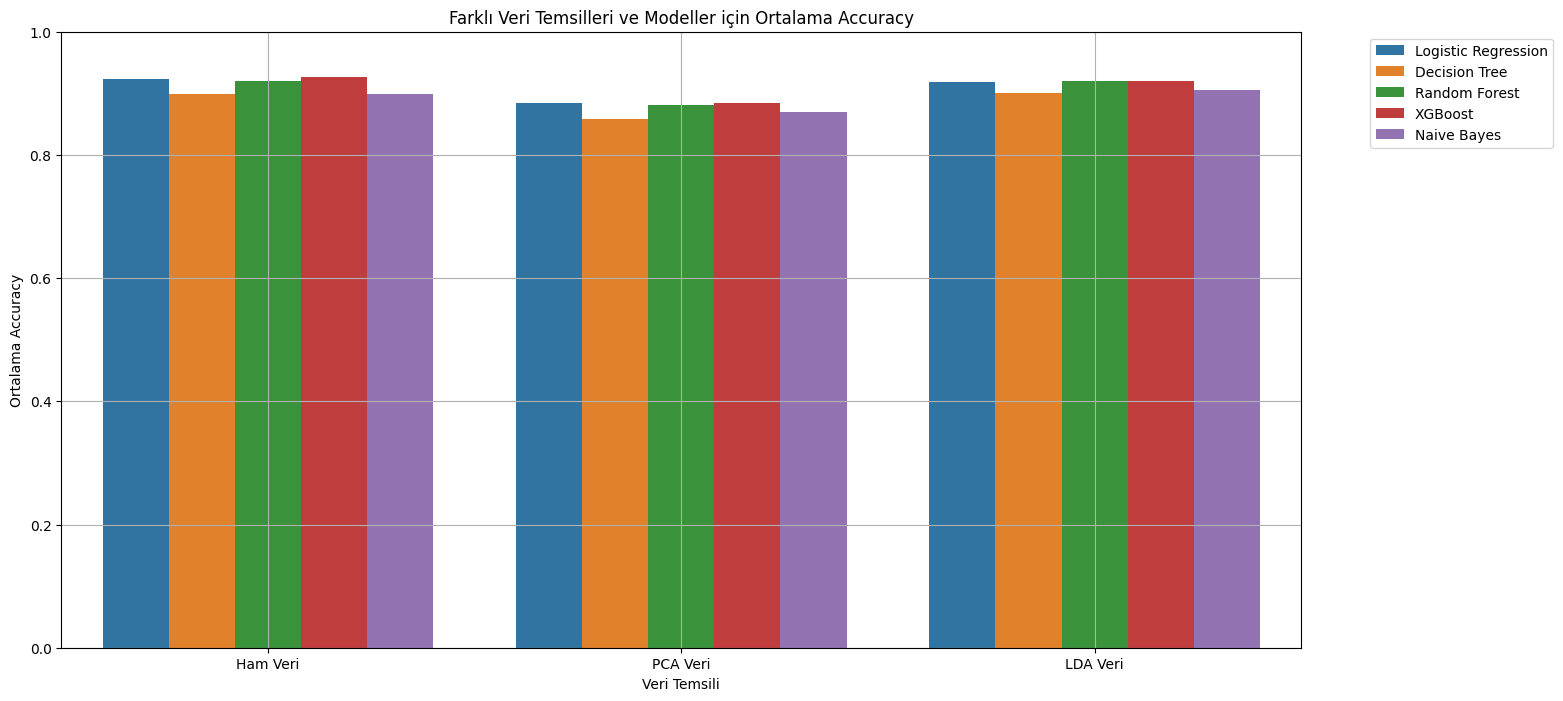

In [230]:
#####################################
# 10. Performans Metrikleri (Accuracy Karşılaştırması) Sonucu
#####################################
# Yukarıdaki tablodaki değerleri grafiğe döküyoruz.
results_df = pd.DataFrame(all_results)
plt.figure(figsize=(16,8))
sns.barplot(data=results_df, x='Veri Temsili', y='Accuracy Mean', hue='Model')
plt.title('Farklı Veri Temsilleri ve Modeller için Ortalama Accuracy')
plt.ylabel('Ortalama Accuracy')
plt.ylim(0,1)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

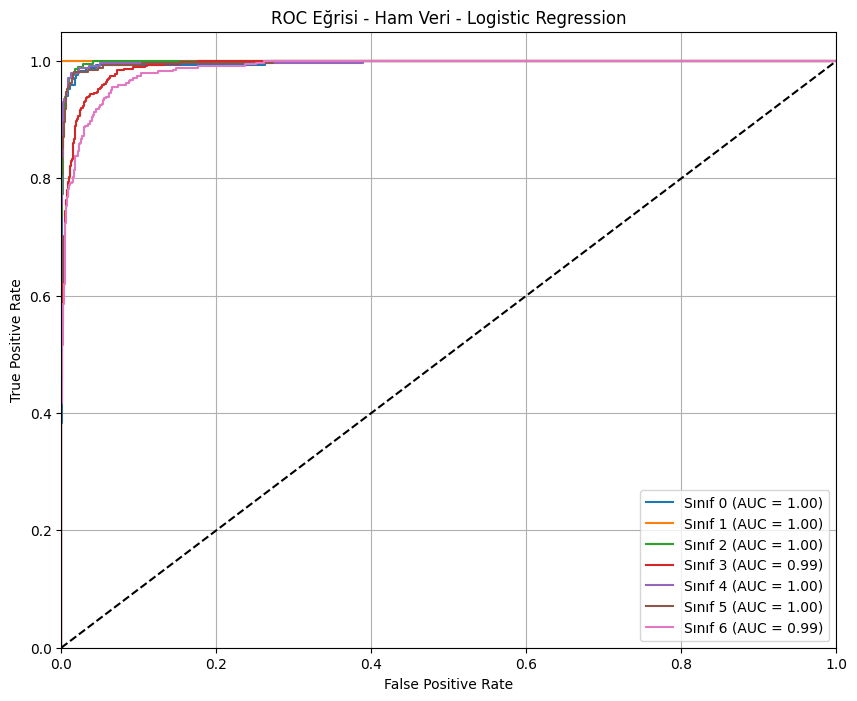

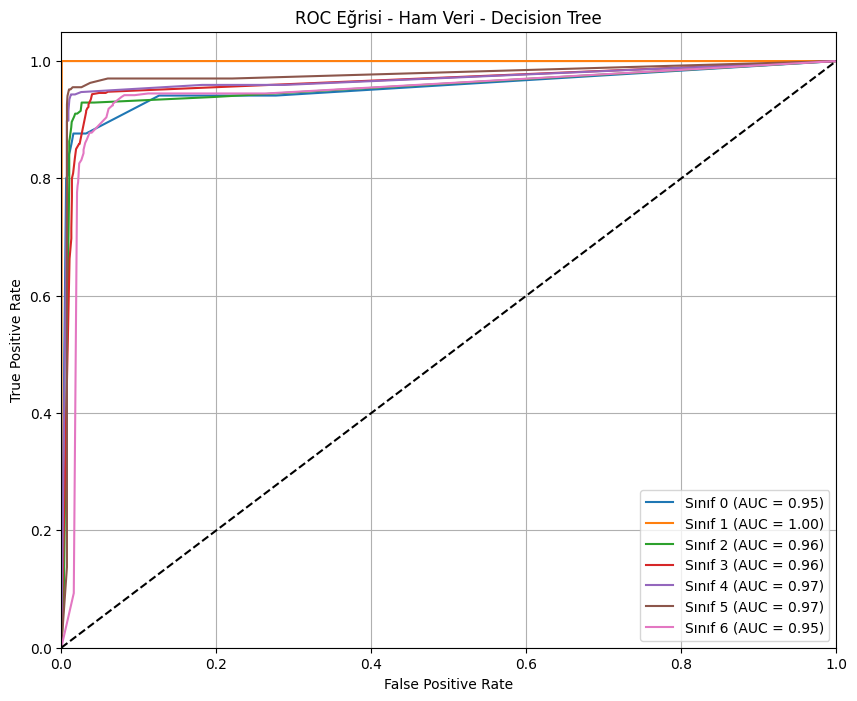

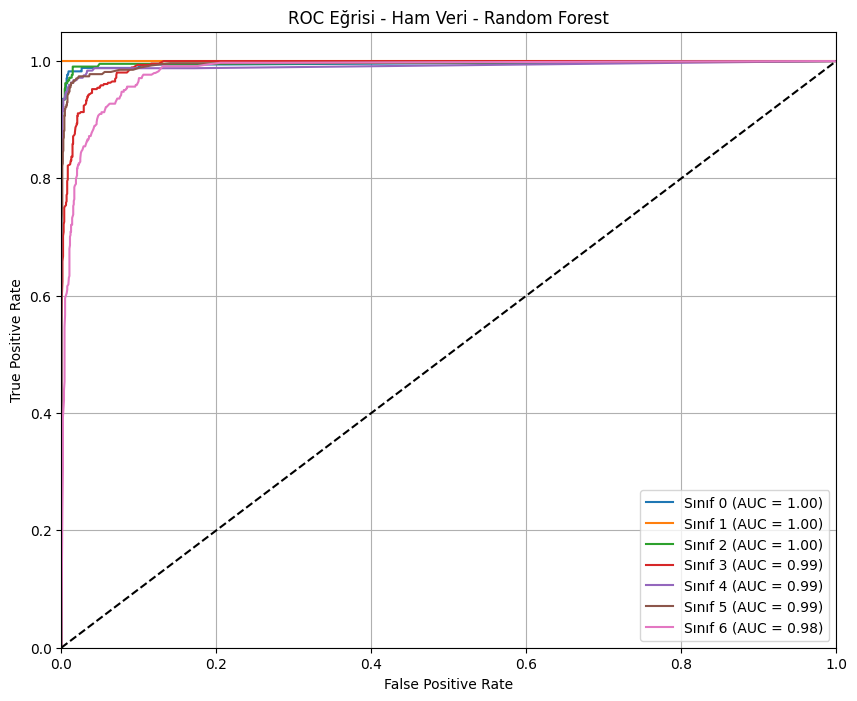

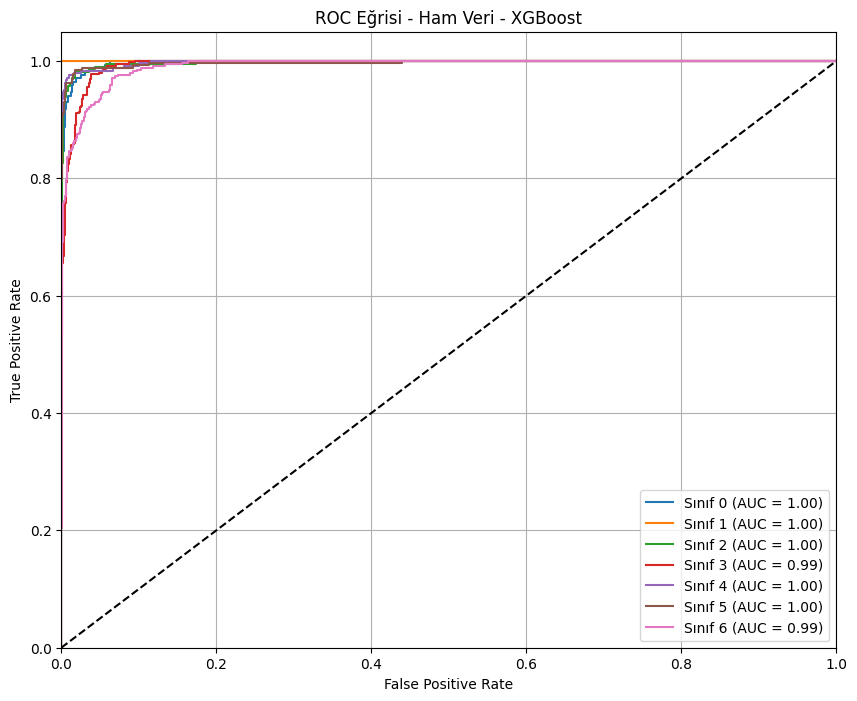

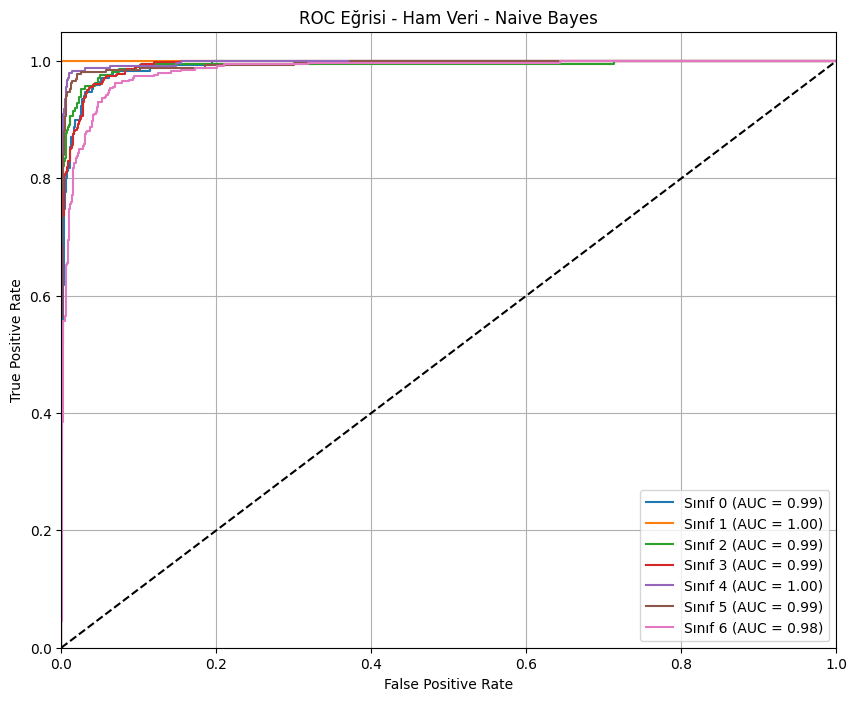

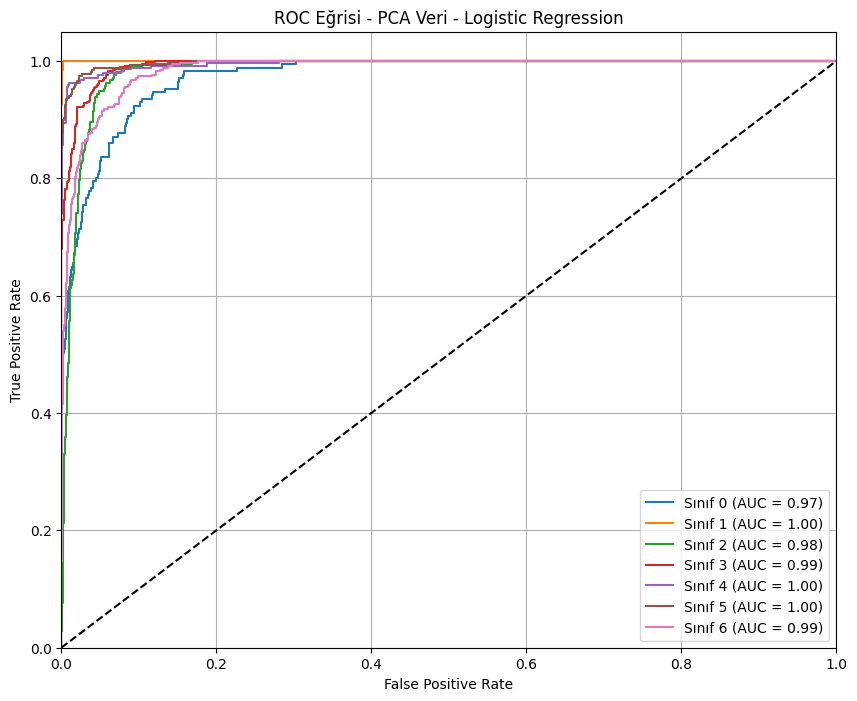

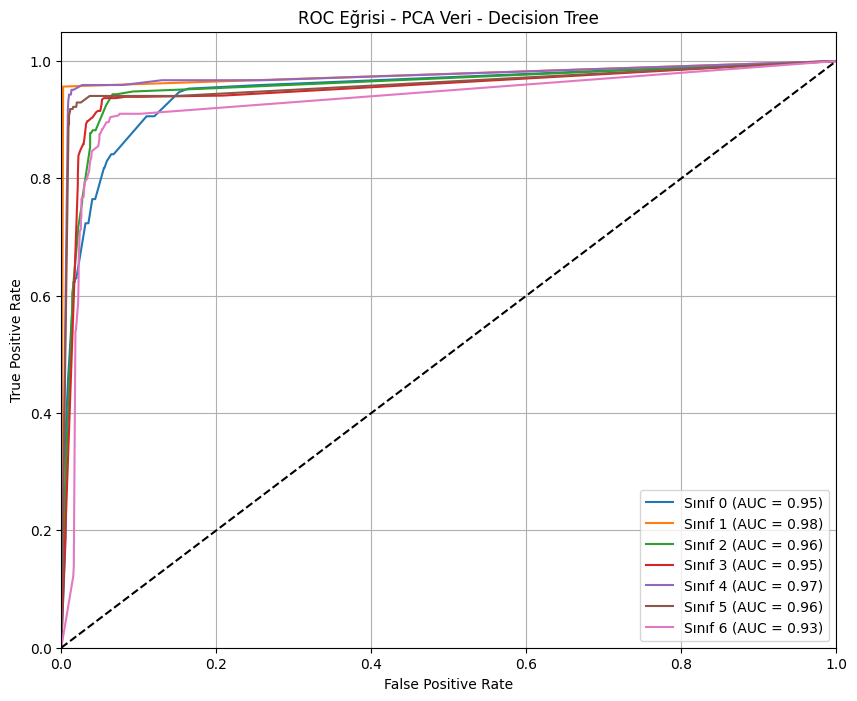

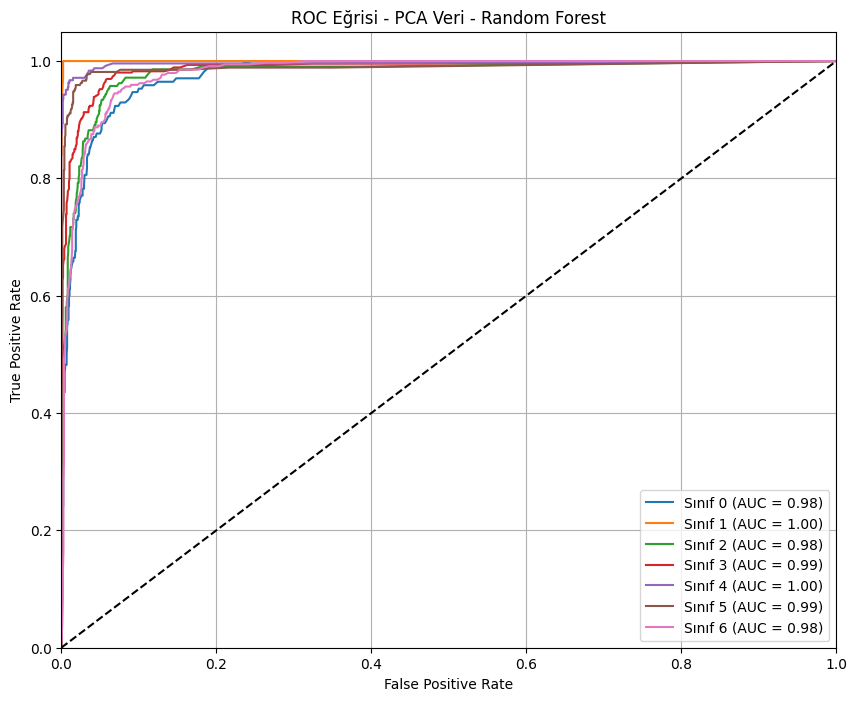

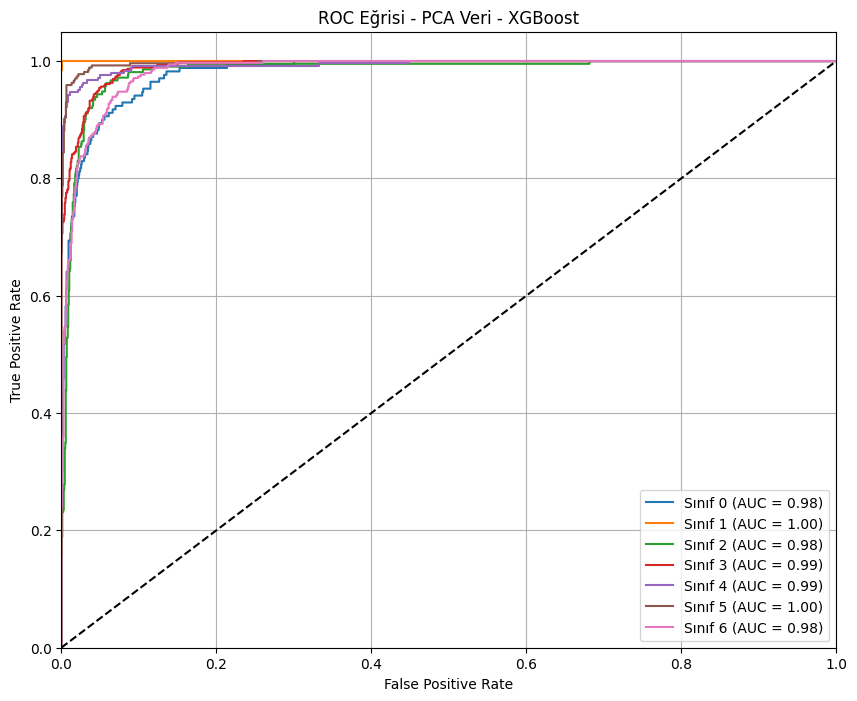

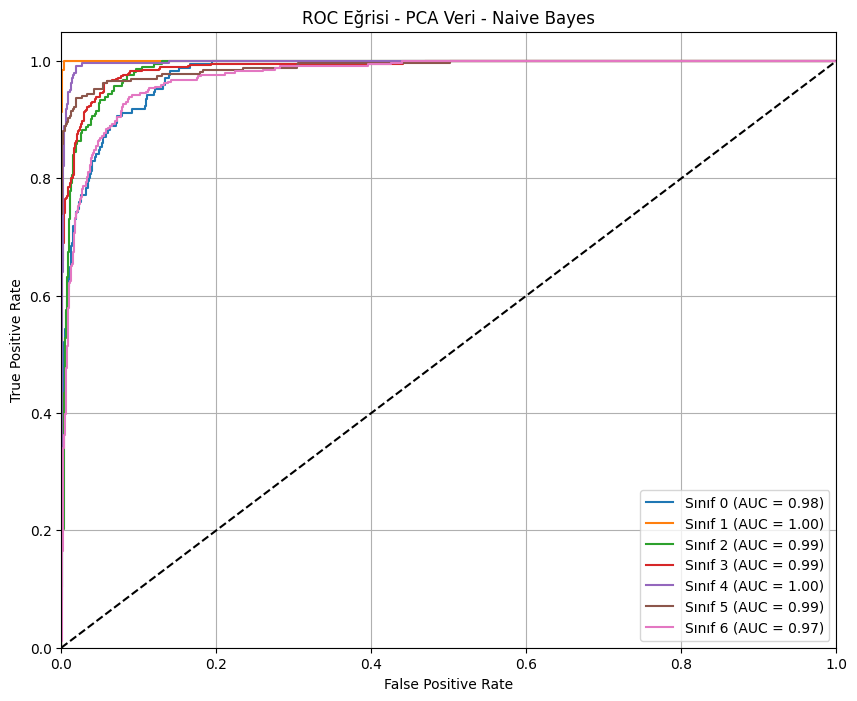

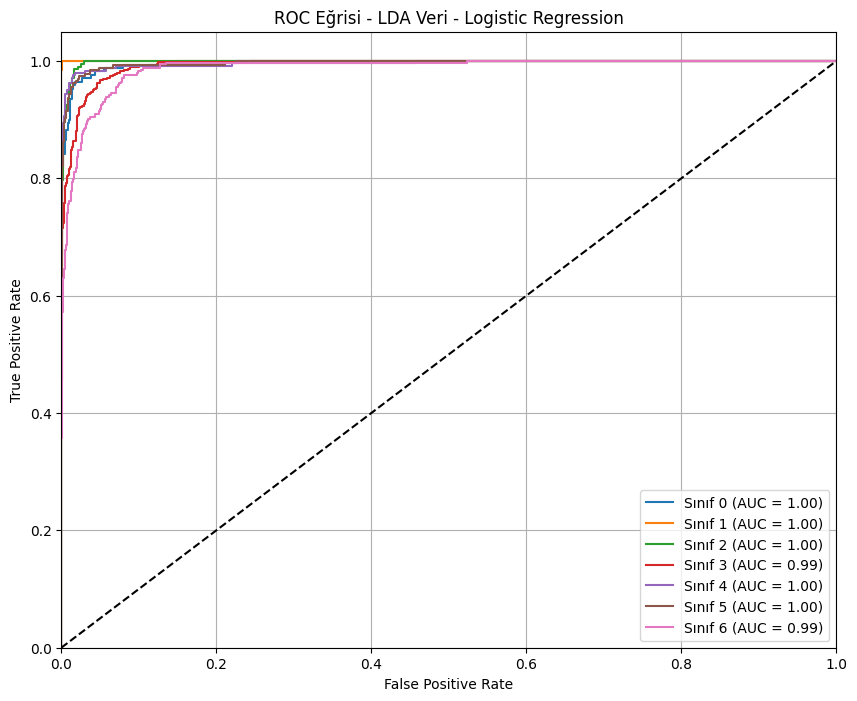

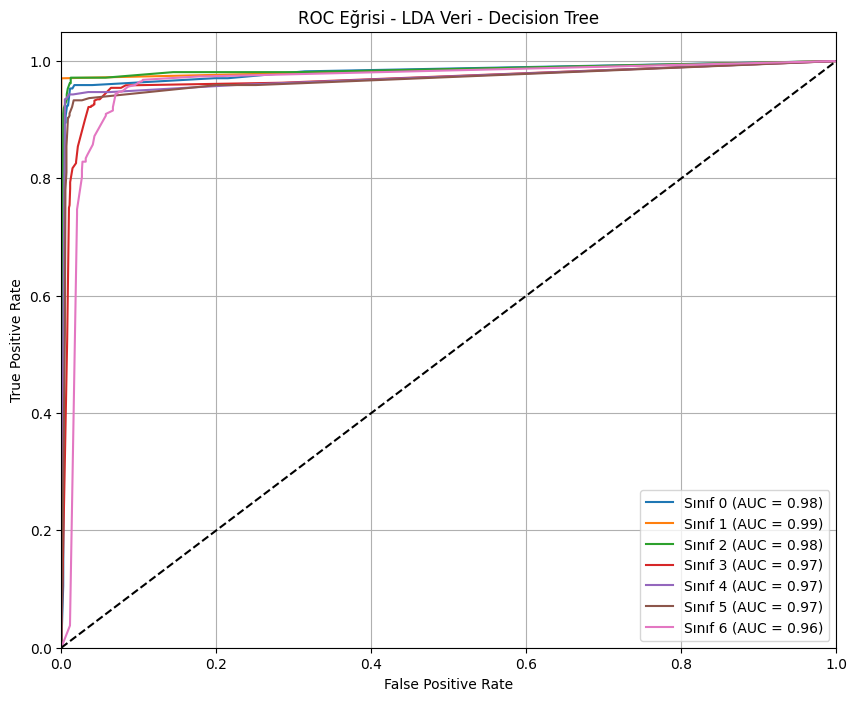

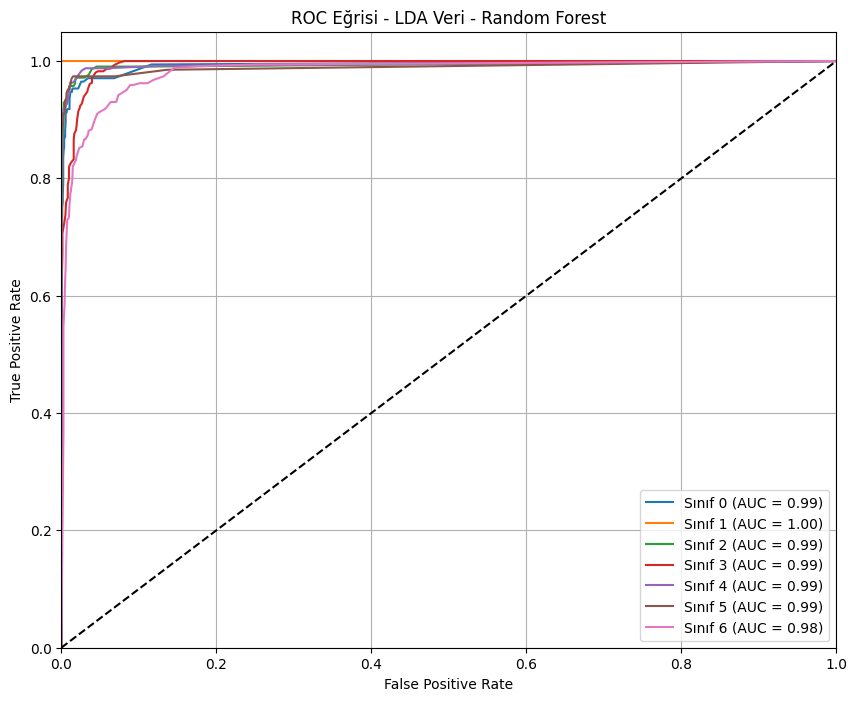

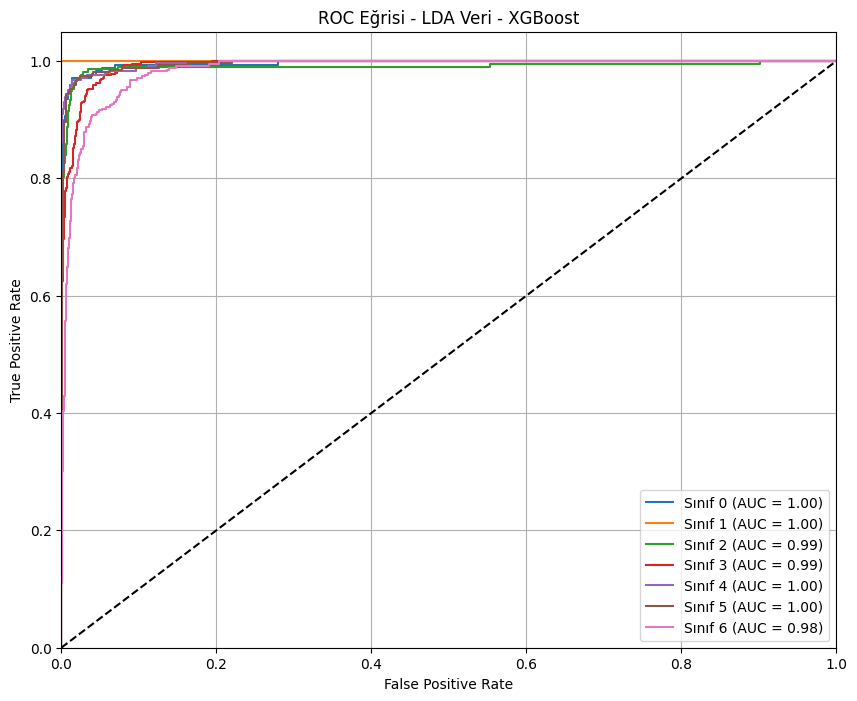

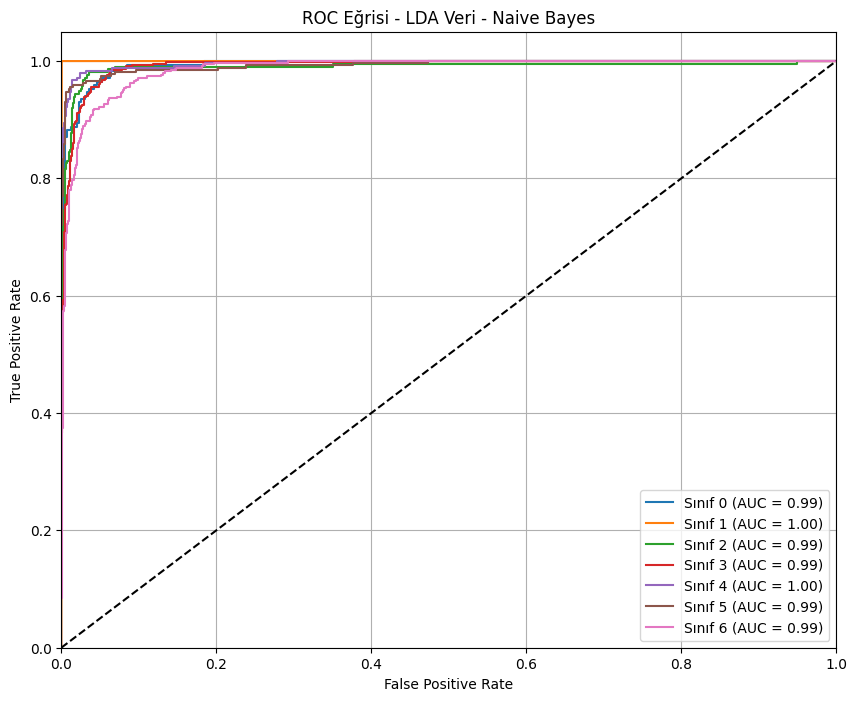

In [231]:
#####################################
# 10. ROC Eğrileri Grafikleri
#####################################
# Ham veride en iyi ROC-AUC skorunu XGBoost sınıflandırıcı modeli almıştır.
# PCA Dönüştürülmüş Veride dönüşümden dolayı ayrım daha zayıf gözükmektedir. ROC-AUC skorları Accuracy gibi azalmış.
# LDA Dönüştürülmüş Veride ROC-AUC skoru Ham veriye benzer sonuç vermiş. En iyi skoru XGBoost ve Random Forest almış.
for (data_name, model_name), (fpr, tpr, roc_auc) in roc_results.items():
    plt.figure(figsize=(10,8))
    for i in range(len(roc_auc)):
        plt.plot(fpr[i], tpr[i], label=f'Sınıf {i} (AUC = {roc_auc[i]:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Eğrisi - {data_name} - {model_name}')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

# MEHMET ZÜLKİF OKUMUŞ - 244329008
# MAKİNE ÖĞRENMESİ ÖDEVİ